## <center>Scripting Week 6</center>
# <center>Visualization</center>

In [1]:
import pandas as pd

## Today

- Visualization
- Wide vs. Long - reshaping
- Collecting Data
- Joins in Pandas
- More Practice!

## Anouncements
   

## Final Project Ideas

# Review

## Selection with Dataframes

`df[         ]`

- `'string'`, `0`
- `['list', 'of', 'strings']`
- `[True, False, True]`
- `1:3`

## JOINs Review, then JOINs in Pandas

Most joins that you need to do are INNER JOINs - combining rows only when both tables overlap on the joining field.

If 
`
SELECT * FROM circulation 
JOIN books ON books.id == circulation.book_id
`
,

- an INNER JOIN will return only rows of `circulation` where the `book_id` is also in `books.id`, joined with rows of `books` where `id` is in `circulation.book_id`

In [2]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///../data/circulation.sqlite')

In [3]:
sample_books = pd.read_sql("SELECT * FROM sbooks", engine)
sample_books

,id,title,author
0,1670,Nineteen Minutes,Jodi Picoult
1,251,The Prodigal Daughter,Jeffrey Archer
2,833,The Phantom of the Opera - Movie Selections,Andrew Lloyd Webber
3,978,Edipo Rey,Sophocles
4,625,La ferme des animaux,George Orwell


In [5]:
sample_circ = pd.read_sql("SELECT * FROM scirculation", engine)
sample_circ

,book_id,checkout_time
0,499,2017-12-21 13:20:29.000000
1,978,2017-04-26 15:32:17.000000
2,883,2017-09-25 12:48:34.000000
3,625,2017-05-19 20:37:09.000000


<img src='../images/scirc.png' width='195px' style='float:left'><img src='../images/sbooks.png' width='300px' style='float:left'>

In groups of two or three, see if you can figure out what rows are returned with different JOINS:

- What does an `INNER JOIN` look like?
- What does an `LEFT JOIN` look like?
- What does an `OUTER JOIN` look like?

<img src='../images/scirc.png' width='195px' style='float:left'><img src='../images/sbooks.png' width='300px' style='float:left'>

*(FYI, a triple-quoted string is a multi-line string in Python. If you want to add line breaks, you can use it.)*

In [10]:
sql = '''SELECT * FROM scirculation
INNER JOIN sbooks ON scirculation.book_id == sbooks.id;'''
pd.read_sql(sql, engine)

,book_id,checkout_time,id,title,author
0,978,2017-04-26 15:32:17.000000,978,Edipo Rey,Sophocles
1,625,2017-05-19 20:37:09.000000,625,La ferme des animaux,George Orwell


If you only write `JOIN`, it assumes an `INNER JOIN`

<img src='../images/scirc.png' width='195px' style='float:left'><img src='../images/sbooks.png' width='300px' style='float:left'>

In [7]:
sql= '''SELECT * FROM scirculation LEFT JOIN sbooks ON scirculation.book_id == sbooks.id;'''
pd.read_sql(sql, engine)

,book_id,checkout_time,id,title,author
0,499,2017-12-21 13:20:29.000000,NaN,None,None
1,978,2017-04-26 15:32:17.000000,978.0,Edipo Rey,Sophocles
2,883,2017-09-25 12:48:34.000000,NaN,None,None
3,625,2017-05-19 20:37:09.000000,625.0,La ferme des animaux,George Orwell


<img src='../images/scirc.png' width='195px' style='float:left'><img src='../images/sbooks.png' width='300px' style='float:left'>

In [8]:
sql= '''SELECT * FROM scirculation
OUTER JOIN sbooks ON scirculation.book_id == sbooks.id;'''
pd.read_sql(sql, engine)

OperationalError: (sqlite3.OperationalError) unknown join type: OUTER
[SQL: SELECT * FROM scirculation
OUTER JOIN sbooks ON scirculation.book_id == sbooks.id;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

They're so rare, that SQLite doesn't even support them!

Let's try the equivalent in Pandas.

In [12]:
sample_books.merge(sample_circ,
                   left_on='id',
                   right_on='book_id',
                   how='inner')

,id,title,author,book_id,checkout_time
0,978,Edipo Rey,Sophocles,978,2017-04-26 15:32:17.000000
1,625,La ferme des animaux,George Orwell,625,2017-05-19 20:37:09.000000


In [13]:
sample_books.merge(sample_circ,
                   left_on='id',
                   right_on='book_id',
                   how='left')

,id,title,author,book_id,checkout_time
0,1670,Nineteen Minutes,Jodi Picoult,NaN,NaN
1,251,The Prodigal Daughter,Jeffrey Archer,NaN,NaN
2,833,The Phantom of the Opera - Movie Selections,Andrew Lloyd Webber,NaN,NaN
3,978,Edipo Rey,Sophocles,978.0,2017-04-26 15:32:17.000000
4,625,La ferme des animaux,George Orwell,625.0,2017-05-19 20:37:09.000000


In [14]:
sample_books.merge(sample_circ,
                   left_on='id',
                   right_on='book_id',
                   how='outer')

,id,title,author,book_id,checkout_time
0,251.0,The Prodigal Daughter,Jeffrey Archer,NaN,NaN
1,NaN,NaN,NaN,499.0,2017-12-21 13:20:29.000000
2,625.0,La ferme des animaux,George Orwell,625.0,2017-05-19 20:37:09.000000
3,833.0,The Phantom of the Opera - Movie Selections,Andrew Lloyd Webber,NaN,NaN
4,NaN,NaN,NaN,883.0,2017-09-25 12:48:34.000000
5,978.0,Edipo Rey,Sophocles,978.0,2017-04-26 15:32:17.000000
6,1670.0,Nineteen Minutes,Jodi Picoult,NaN,NaN


![test](../images/scirc_fulljoin.png)

## Wide vs Long Data

Wide data has multiple variables for each observation organized horizontally across many columns. Long data has each observation-variable pair in a separate row, resulting in fewer columns and more rows. Wide data is compact but can be less flexible, while long data is more easily processed and analyzed computational.

In [15]:
app = pd.read_csv('../data/IMLS_Appropriations__FY_2002-2017_.csv')
app.head()

,Authority,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002
0,LSTA: Grants to States,154848000,155789000,154848000,154848000,150000000,156365000,160032000,172561000,171500000,160885000,163746000,163746000,160704000,157628000,150435000,149014000
1,LSTA: Native American Library Services,3861000,4063000,3861000,3861000,3667000,3869000,3960000,4000000,3717000,3574000,3638000,3638000,3472000,3206000,3055000,2941000
2,LSTA: National Leadership: Libraries,13720000,13092000,12200000,12200000,11377000,11946000,12225000,12437000,12437000,12159000,12375000,12375000,12301000,11263000,11009000,11081000
3,LSTA: Laura Bush 21st Century Librarian,10000000,10000000,10000000,10000000,10000000,12524000,12818000,24525000,24525000,23345000,23760000,23760000,22816000,19882000,9935000,0
4,"SUBTOTAL, LIBRARY SERVICES TECHNOLOGY ACT (LSTA)",182429000,182944000,180909000,180909000,175044000,184704000,189035000,213523000,212179000,199963000,203519000,203519000,199293000,191979000,174434000,163036000


In [16]:
long_app = pd.melt(app, id_vars='Authority',
                   var_name='year', value_name='money')
long_app

,Authority,year,money
0,LSTA: Grants to States,2017,154848000
1,LSTA: Native American Library Services,2017,3861000
2,LSTA: National Leadership: Libraries,2017,13720000
3,LSTA: Laura Bush 21st Century Librarian,2017,10000000
4,"SUBTOTAL, LIBRARY SERVICES TECHNOLOGY ACT (LSTA)",2017,182429000
...,...,...,...
283,AAHCA: Museum Grants for African American Hist...,2002,0
284,"SUBTOTAL, ALL MUSEUM PROGRAMS (MSA & AFRICAN A...",2002,24229000
285,MUSEUM AND LIBRARY SERVICES ACT (MLSA) GENERAL...,2002,7712000
286,CONGRESSIONAL EARMARKS,2002,29524000


In [17]:
enwidened = long_app.pivot(index='Authority', columns='year')
enwidened.head()

money             \
year                                                     2002       2003   
Authority                                                                  
AAHCA: Museum Grants for African American Histo...          0          0   
CONGRESSIONAL EARMARKS                               29524000   35156000   
LSTA: Grants to States                              149014000  150435000   
LSTA: Laura Bush 21st Century Librarian                     0    9935000   
LSTA: National Leadership: Libraries                 11081000   11009000   

                                                                          \
year                                                     2004       2005   
Authority                                                                  
AAHCA: Museum Grants for African American Histo...          0          0   
CONGRESSIONAL EARMARKS                               32595000   39889000   
LSTA: Grants to States                              157628000  160704000   
LSTA: Laura Bush 21st Century Librarian              19882000   22816000   
LSTA: National Leadership: Libraries                 11263000   12301000   

                                                                          \
year                                                     2006       2007   
Authority                                                                  
AAHCA: Museum Grants for African American Histo...     842000     842000   
CONGRESSIONAL EARMARKS                                      0          0   
LSTA: Grants to States                              163746000  163746000   
LSTA: Laura Bush 21st Century Librarian              23760000   23760000   
LSTA: National Leadership: Libraries                 12375000   12375000   

                                                                          \
year                                                     2008       2009   
Authority                                                                  
AAHCA: Museum Grants for African American Histo...     827000    1310000   
CONGRESSIONAL EARMARKS                               18285000   10737000   
LSTA: Grants to States                              160885000  171500000   
LSTA: Laura Bush 21st Century Librarian              23345000   24525000   
LSTA: National Leadership: Libraries                 12159000   12437000   

                                                                          \
year                                                     2010       2011   
Authority                                                                  
AAHCA: Museum Grants for African American Histo...    1485000    1443000   
CONGRESSIONAL EARMARKS                               16382000          0   
LSTA: Grants to States                              172561000  160032000   
LSTA: Laura Bush 21st Century Librarian              24525000   12818000   
LSTA: National Leadership: Libraries                 12437000   12225000   

                                                                          \
year                                                     2012       2013   
Authority                                                                  
AAHCA: Museum Grants for African American Histo...    1410000    1336000   
CONGRESSIONAL EARMARKS                                      0          0   
LSTA: Grants to States                              156365000  150000000   
LSTA: Laura Bush 21st Century Librarian              12524000   10000000   
LSTA: National Leadership: Libraries                 11946000   11377000   

                                                                          \
year                                                     2014       2015   
Authority                                                                  
AAHCA: Museum Grants for African American Histo...    1407000    1407000   
CONGRESSIONAL EARMARKS                                      0          0   
LSTA: Grants to States

Wickham, Hadley. (2014). *Tidy Data.* The Journal of Statistical Software, vol. 59, 2014.

> Tidy datasets are easy to manipulate, model and visualize, and have a specific structure: each variable is a column, each observation is a row, and each type of observational unit is a table. 

What type of data is that?

Long data is the trend, but there are reasons for either version.

Pros:
 - Structure doesn't change when adding data - rows are added by not columns.
 - Column names aren't *data*, just *metadata*
 - Easier for split-apply-combine patterns
 - Multi-dimensional (>2) data easier to preserve
    
Cons:
 - Less convenient for human readability (e.g. comparing a progression over years)
 - Old stats software can favor wide

# Characterizing Data

What do we need to know about our data before visualizing it?

- Number of dimensions
- Type of data
    - Discrete vs. Continuous
    - Dependent and Independent variables
    - Relationships: nominal, ordinal, numeric

## Discrete vs. Continous

*Discrete* variables are countable, and exist on a identifiable, finite scale.

- How many plants do you have? (1, 2, 3, 4)
- What was the result of a coin flip? (Landed on Heads 1,2,3,.. times)

*Continous* variables exist in an infinite scale.

- How much does a cat weigh? (14.123 lbs)
- At what time was a book checked out? (e.g. 10:35:23....)

Think of your range of realistic values: can you only select specific values within that range, or can you feasibly select any value?

- *How many books are checked out?*
- *What was the temperature yesterday?*

### Precision

* Much data is discrete but sampled from a continous distribution. This can be treated as continous data.

e.g. Age saved by year, even though you *could* have infinite precision.

## In data visualization...

- How do *continuous* vs *discrete* change your visual language?

- chart types?
- colors?
- grouping, aggregation?

- discrete variable use chart with discrete symbols representing data - bar charts, pie charts, etc - while continuosu variables use line charts, area charts
- continuous variables may use color gradients, different symbol sizes, to show change along a scale; discrete variables use categorical color schemes, symbols, etc.
- You can group by discrete variables. Grouping by continous variables would be pointless.

<center><h3>Types of Discrete Variables</h3></center>

*Nominal*: Can be counted but not ordered.

<small>e.g. Country GDP (is there a natural order between China, Lichtenstein, and US?)</small>

*Ordinal*: Can be counted and ordered.

<small>e.g. Online product ratings</small>

*Numerical* or *interval*: Ordered, with a meaningful relationship/distance between values.

<small>e.g. Counts or frequencies</small>

Which is which?
 - *Nominal*: Can be counted but not ordered.
 - *Ordinal*: Can be counted and ordered.
 - *Numerical* or *interval*: Ordered, with a meaningful relationship/distance between values.

Going around the room:

1. test scores (60, 70, 80)
2. gender (female, non-binary, male, etc.)
3. survey responses (strongly disagree, disagree, neutral, agree, strongly agree)
4. calendar years (1900, 2000, 2100)
5. blood type (A, B, AB, O)
6. car brands (Toyota, Ford, Honda)
7. educational level (high school, bachelor's, master's, doctorate)
8. income groups (low, middle, high)
9. temperature in Celsius or Fahrenheit (0°C, 20°C, 40°C)

## Independent vs. Dependent

- Independent: The variable that is controlled in an experiment
    - e.g. 'age', 'gender'
    - e.g. 'diet' in a study of healthy eating
- Dependent: The variable that is measured or changes
    - e.g. 'blood pressure', 'weight' in a study of healthy eating

Outside of experimental design, you don't always know what's dependent or independent.

## Number of Dimensions

How many different variables are you trying to visualize at once?

Examples:

- Univariate: Heights of a group of people
- 2-dimensional: What's the relationship between cyclinders in an engine and fuel economy?
- 3-dimensional: What's the relationship between cylinders in an engine and fuel economy, grouped by weight class?

## Size of the Data

How many data points do you have?

If not many: no need to visualize!

## Relationships

- Heirarchical: some measures have parent/child relationships.
    - e.g. folder size on your computer, book counts by call number
- Network relationships: links between data points.
    - e.g. social network data

## Exercises

In [18]:
cats = pd.read_csv('https://raw.githubusercontent.com/organisciak/Scripting-Course/master/data/cat_data.tsv', sep='\t')
beer = pd.read_csv('https://raw.githubusercontent.com/organisciak/Scripting-Course/master/data/beers.csv')
movies = pd.read_csv('https://raw.githubusercontent.com/organisciak/Scripting-Course/master/data/movielens_small.csv')
imls = pd.read_csv('https://raw.githubusercontent.com/organisciak/Scripting-Course/master/data/imls_mini_by_state.csv')
mpg = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/mpg.csv', index_col=0)

In [19]:
cats.head()

,Sex,Bwt,Hwt
0,M,2.0,6.5
1,M,2.0,6.5
2,M,2.1,10.1
3,M,2.2,7.2
4,M,2.2,7.6


- Sex: Categorical
- Bwt: Continuous
- Hwt: Continuous

In [21]:
cats.corr(numeric_only=True)

,Bwt,Hwt
Bwt,1.00000,0.79303
Hwt,0.79303,1.00000


In [22]:
beer.head()

,abv,ibu,id,name,type,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


- abv: continuous
- type: nominal
- ounces: continuous or interval

In [23]:
movies.head()

,userId,rating,title,genres,timestamp,year
0,1,2.5,Dangerous Minds,Drama,1260759144,1995
1,7,3.0,Dangerous Minds,Drama,851868750,1995
2,31,4.0,Dangerous Minds,Drama,1273541953,1995
3,32,4.0,Dangerous Minds,Drama,834828440,1995
4,36,3.0,Dangerous Minds,Drama,847057202,1995


- genres: nominal/categorical
- rating: ordinal (often treated as interval)
- timestamp: continuous
- year: continuous or interval

# Visualization

Why visualize?

## Visualization in Pandas

Pandas uses a library called `matplotlib` under the hood - another part of the 'Scipy Stack'.

Basic line plot:

```
df.plot()
```

That's it!

In [24]:
# Changing default plot size 
# (IGNORE -- this is for better slide presentation)
import matplotlib
# Default (6,4) at DPI 72
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams['figure.dpi'] = (150)

*What's the y-axis? What's the x-axis?*

Hmmm... some problems:
- There's no continuous dependent variable for a line chart.
- It tries to plot *every* int or float column as a line.
- The 'index as x-axis' isn't insightful.

Explicitly setting an x and y plot:

```python
df.plot(x=..., y=...)
```

e.g.

<Axes: xlabel='Bwt'>

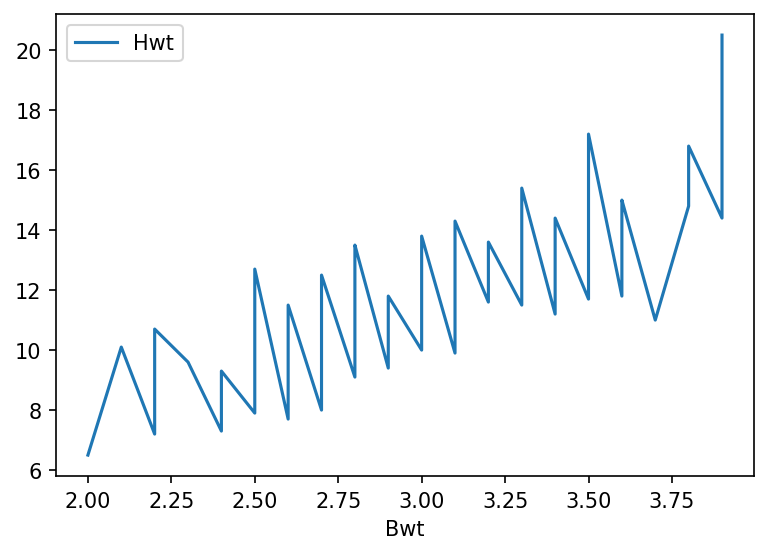

In [25]:
cats.plot(x='Bwt', y='Hwt')

## Setting the type of plot

Use the `kind` argument:

<Axes: xlabel='Bwt', ylabel='Hwt'>

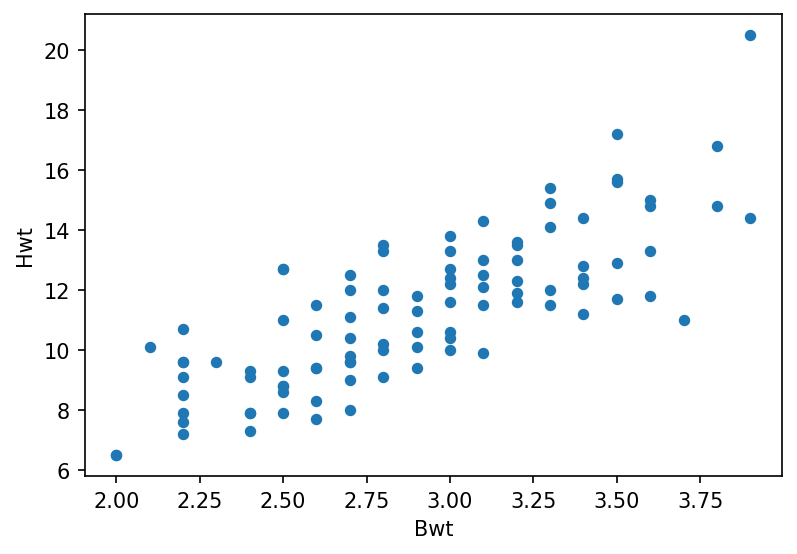

In [26]:
cats.plot(x='Bwt', y='Hwt', kind='scatter')

# Kinds of Plots in Matplotlib

## *Bar Chart* and *Horizontal Bar Chart*

`kind='bar'`, `kind='barh'`

Good for categorical discrete data.

Dimensions: 2 axes. Color can be used for 3rd dimension.

<Axes: xlabel='State'>

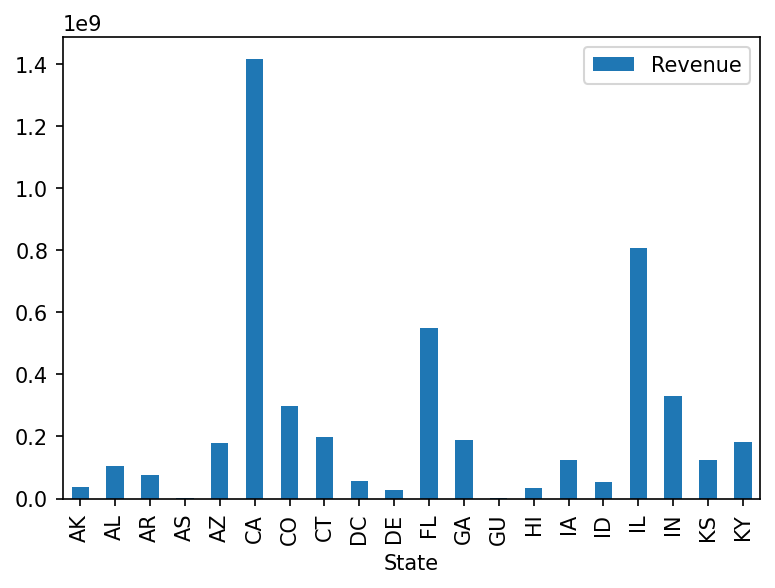

In [27]:
imls.head(20).plot(kind='bar', x='State', y='Revenue')

You can add more arguments to customize it the plot.

<Axes: xlabel='State'>

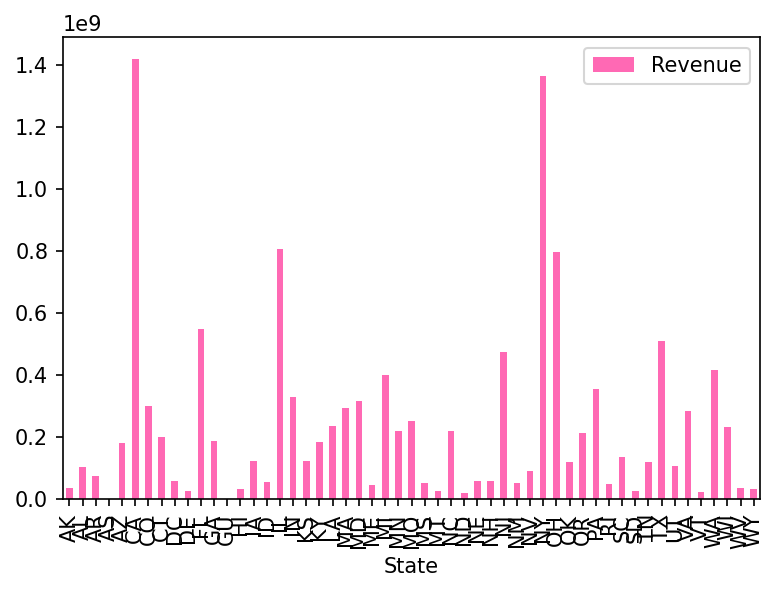

In [28]:
imls.plot(kind='bar', x='State', y='Revenue', color='hotpink')

FYI: Our 'easy' approach to visualization, through Pandas, can take color names or codes, but you can't easily color against a variable.

'barh' is just 'bar' rotated (literally - 'x' refers to the vertical axis).

Good for many categories: easier to read and - on screens - the height of an image can scale better than the width.

<Axes: ylabel='State'>

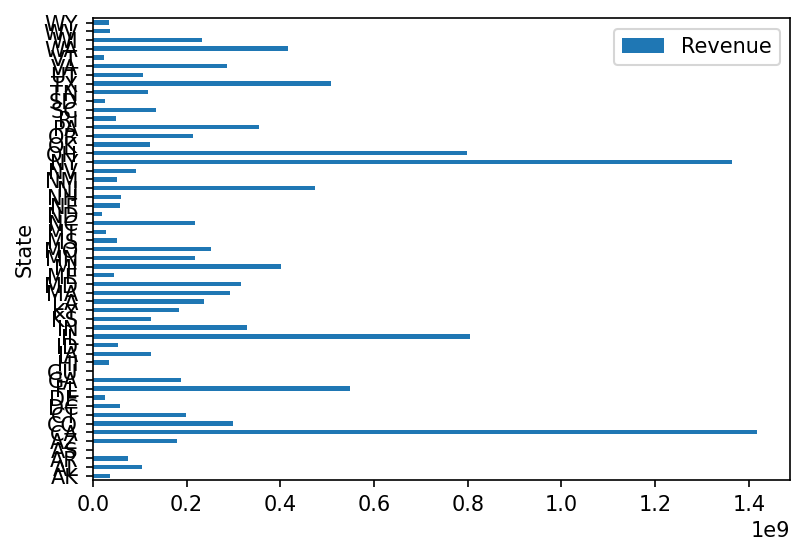

In [29]:
imls.plot(kind='barh', x='State', y='Revenue') 

<Axes: ylabel='State'>

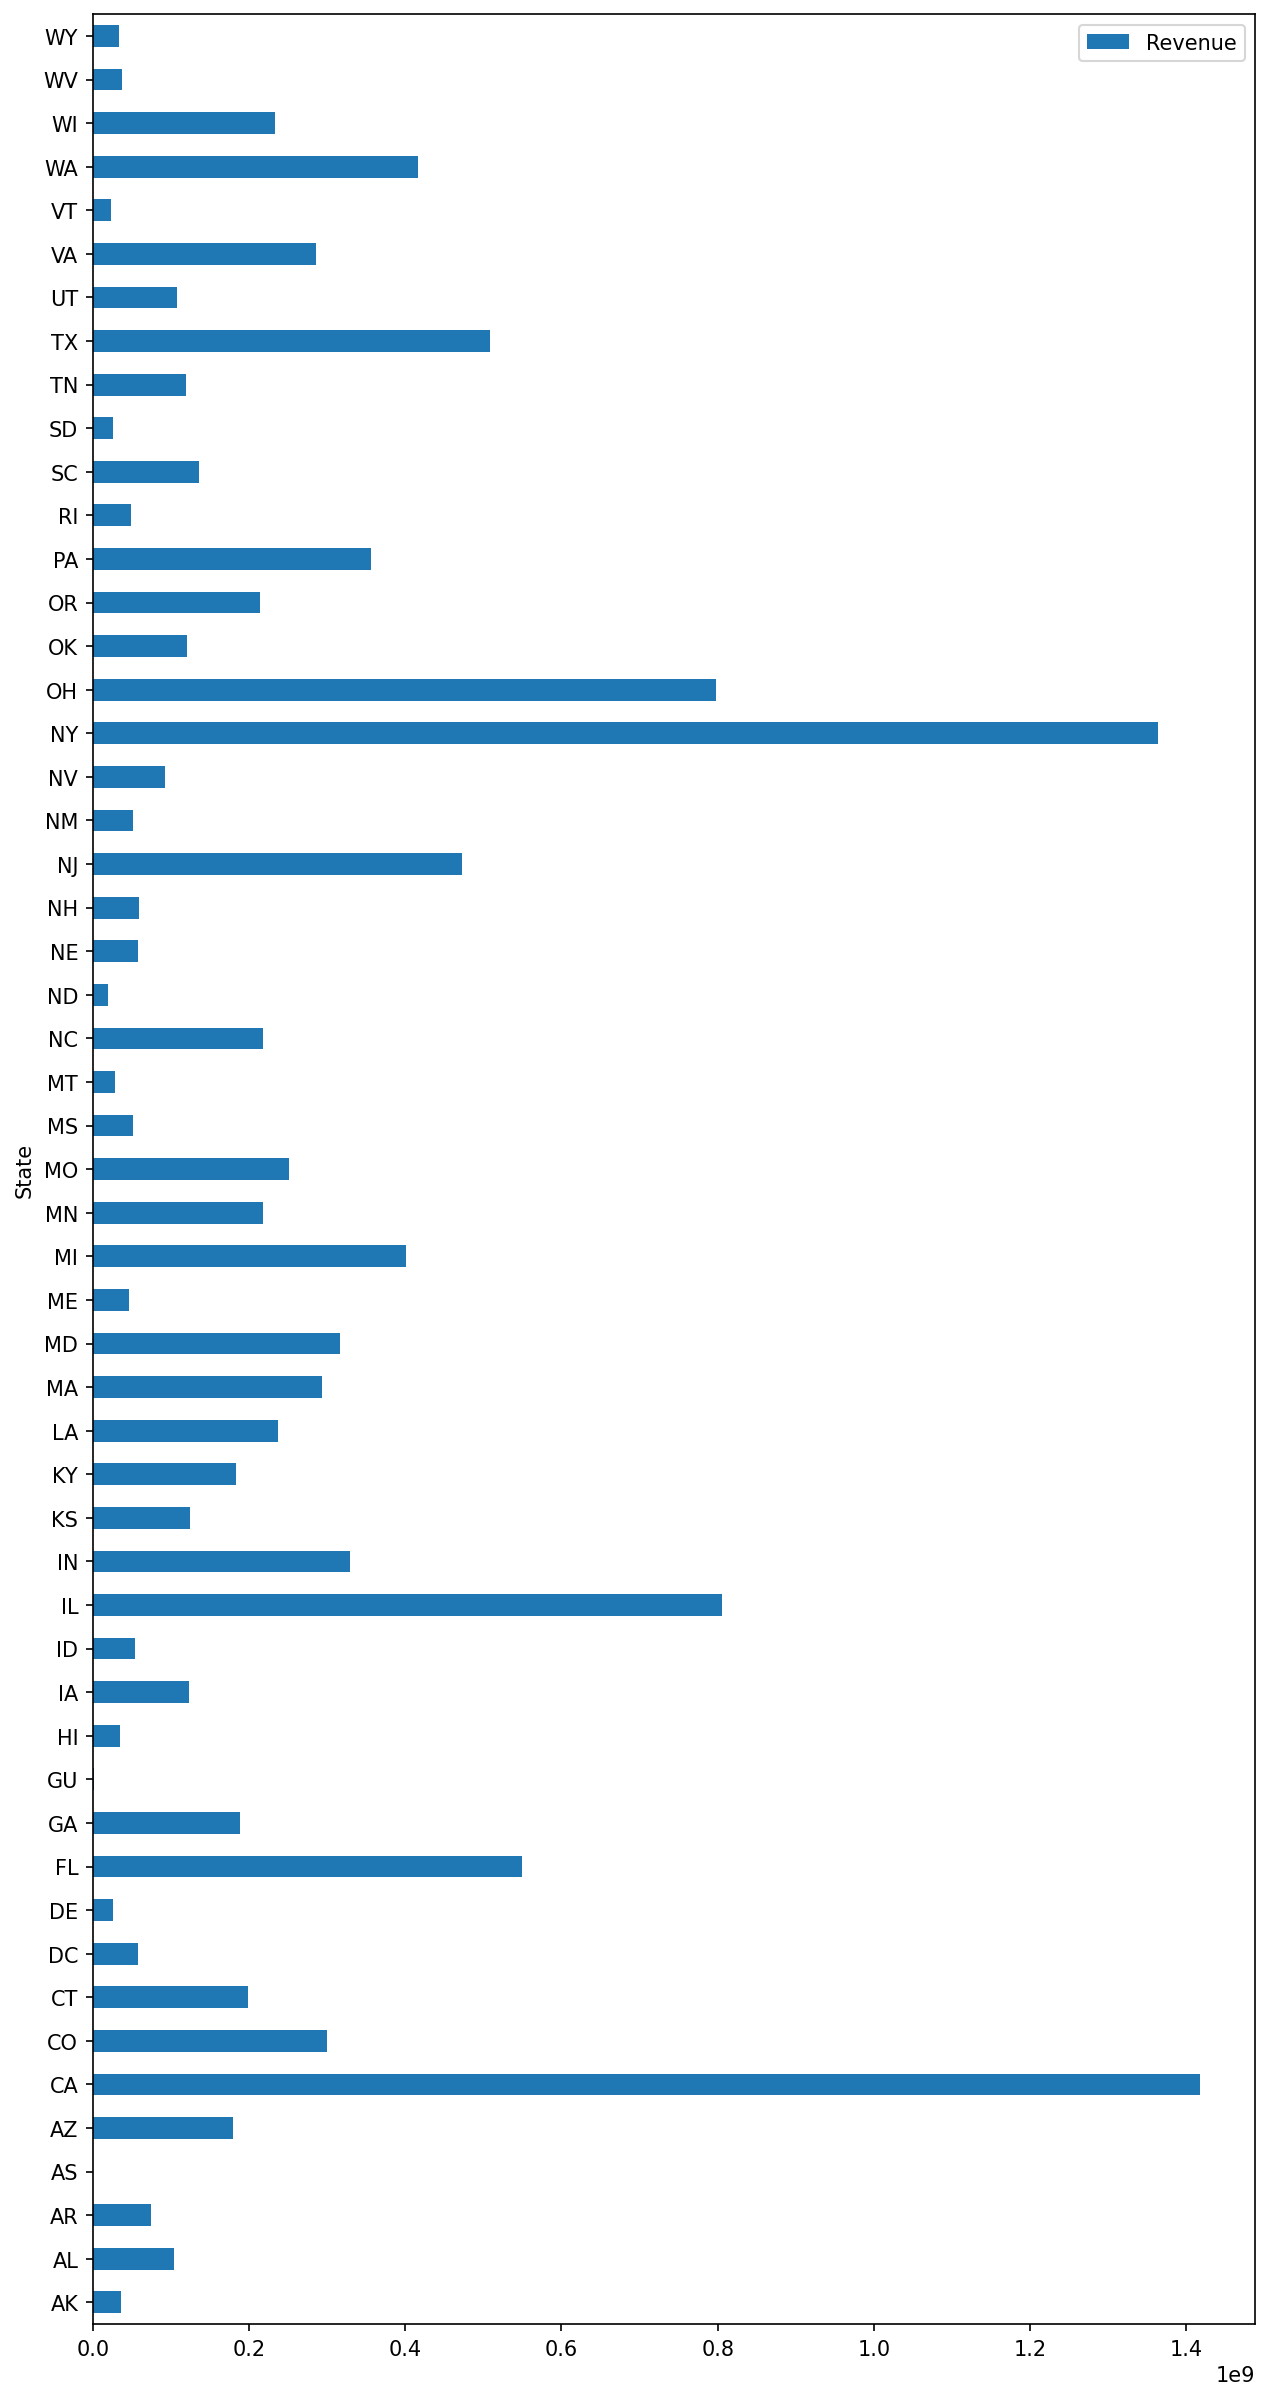

In [30]:
imls.plot(kind='barh', x='State', y='Revenue', figsize=(10,20)) 

## Univariate Data

*What might you want to know from a single dimension?*

Most often: distribution / density

`kind = 'hist'`, `kind = 'density'` (or 'kde')

### Histogram

Essentially, a bar chart that organizes continuous data into bins.

In [31]:
beer[['abv']].head()

,abv
0,0.050
1,0.066
2,0.071
3,0.090
4,0.075


<Axes: ylabel='Frequency'>

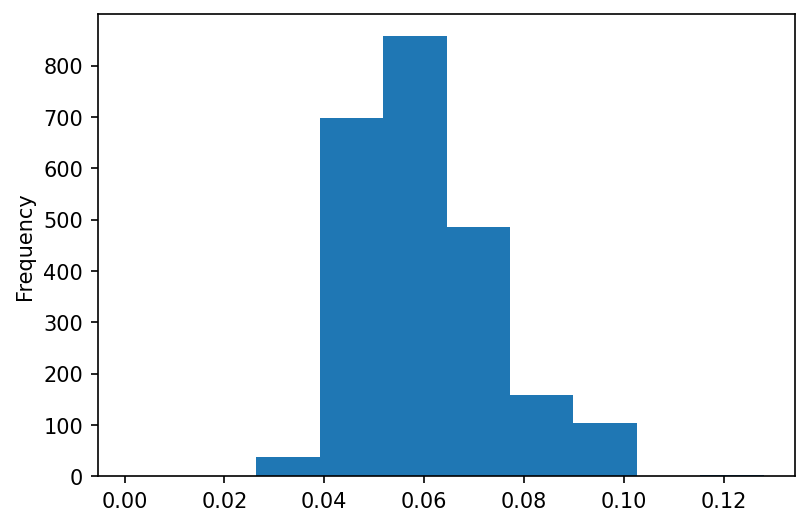

In [32]:
beer['abv'].plot(kind='hist')

- *What are the intervals for the bins?*
- *Is this a DataFrame or Series being plotted?*
  - *Will the other datatype plot in the same way?*

To change, use the `bins` argument to specify how many bars there will be across the range.

<Axes: ylabel='Frequency'>

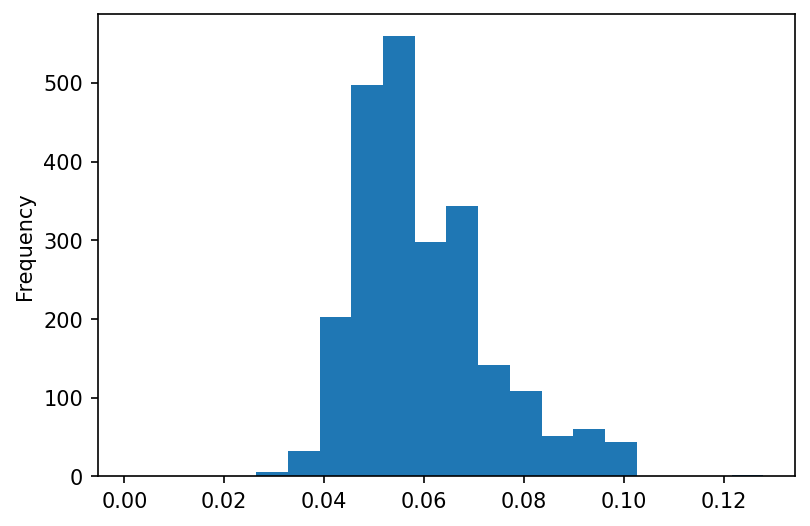

In [33]:
beer.abv.plot(kind='hist', bins=20)

<Axes: ylabel='Frequency'>

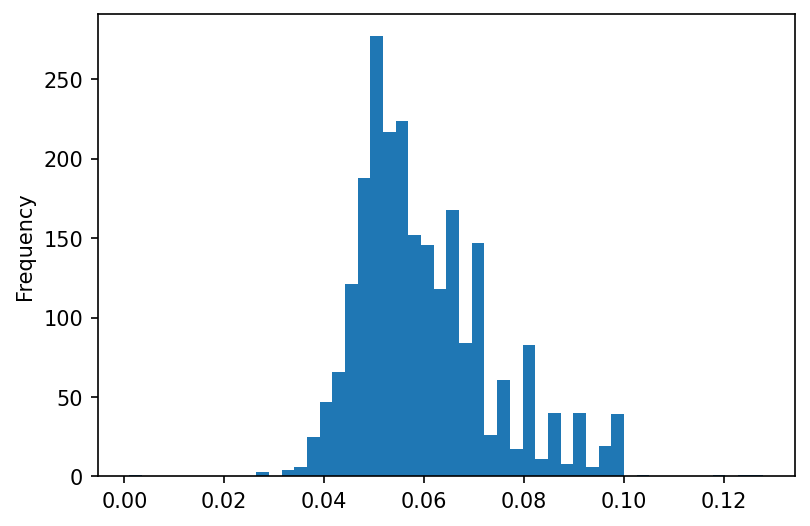

In [34]:
beer.abv.plot(kind='hist', bins=50)

Too little:

<Axes: ylabel='Frequency'>

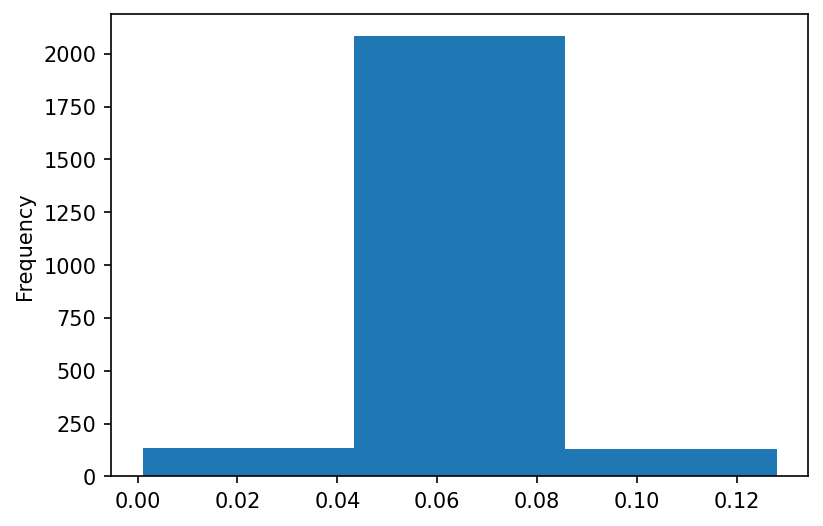

In [35]:
beer.abv.plot(kind='hist', bins=3)

Too much:

<Axes: ylabel='Frequency'>

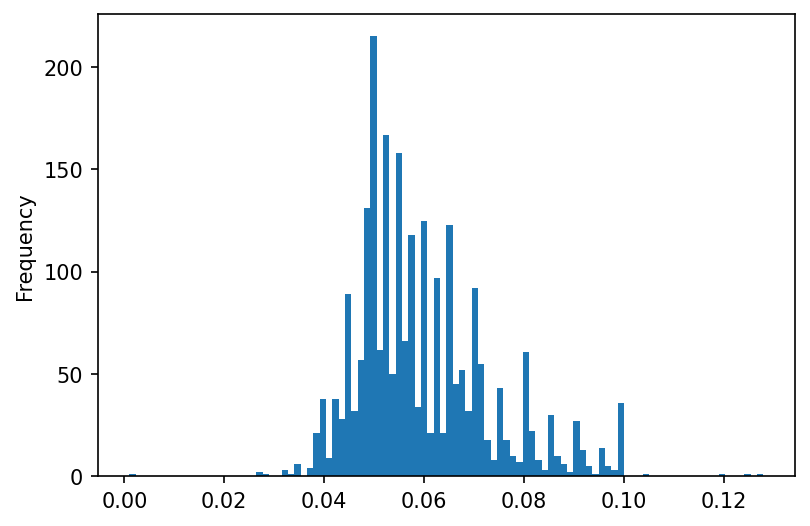

In [36]:
beer.abv.plot(kind='hist', bins=100)

### Kernel Density

Like a histogram, but with an interpolated line tracing the distribution shape.

ModuleNotFoundError: No module named 'scipy'

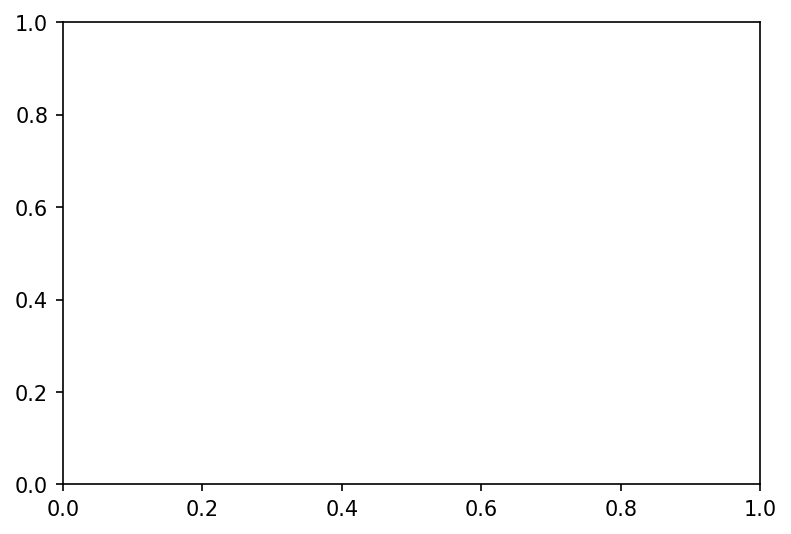

In [37]:
beer.abv.plot(kind='density' )

- interactive plots (note active plots)
- There are many options for customizing plots - this is where good online searching can help you!

## Multi-variate version of a histogram: Hexplot

- Color is used to show density across two dimensions.

<Axes: xlabel='Bwt', ylabel='Hwt'>

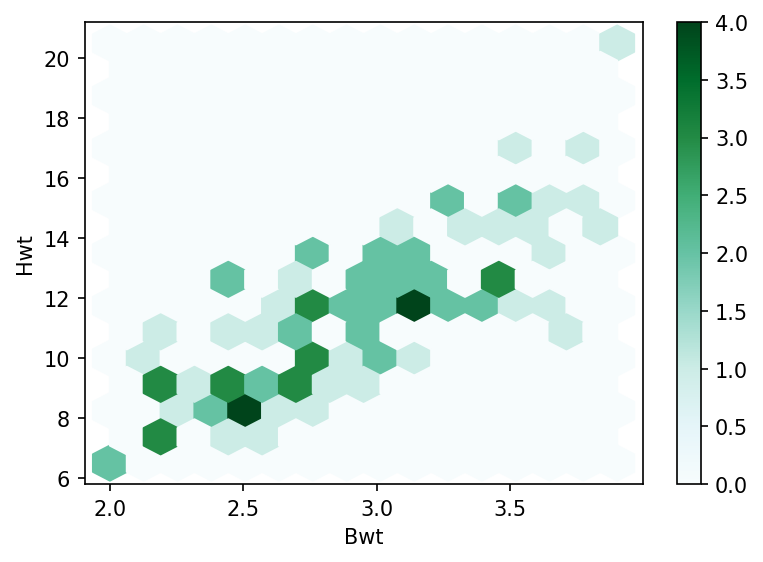

In [38]:
cats.plot(kind='hexbin', x='Bwt', y='Hwt', gridsize=15)

Compare to:

<Axes: xlabel='Bwt', ylabel='Hwt'>

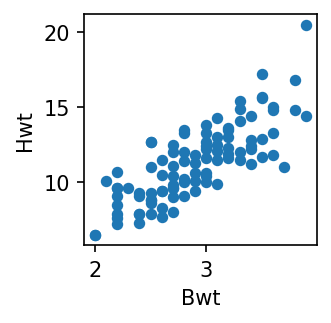

In [39]:
cats.plot(kind='scatter', x='Bwt', y='Hwt', figsize=(2,2))

## Pie Charts: Univariate data that adds to a whole

`kind = 'pie'`

In [40]:
counts_by_category = beer['type'].value_counts()
counts_by_category.head(2)

type
American IPA               424
American Pale Ale (APA)    245
Name: count, dtype: int64

<Axes: ylabel='count'>

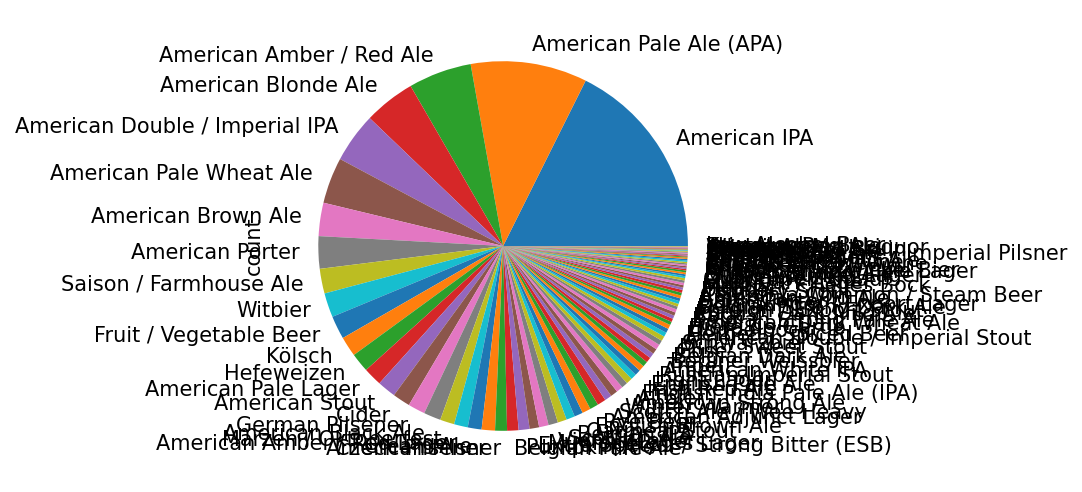

In [41]:
counts_by_category.plot(kind='pie')

Incomplete:

<Axes: ylabel='count'>

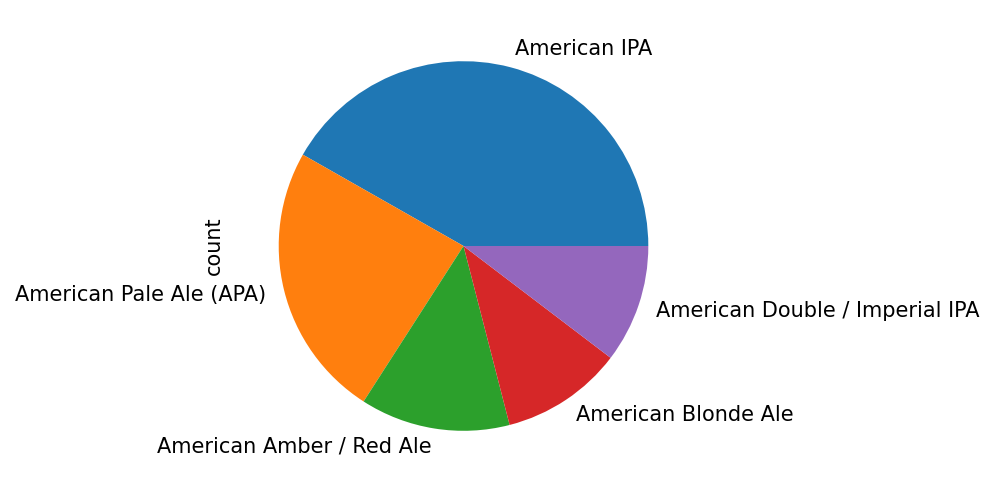

In [42]:
counts_by_category[:5].plot(kind='pie')

*How might we combine all the other values into an 'other' category?*

(No trick, just break down the problem)

One approach:
- sort values
- take the top 5 rows (Table A)
- sum the remaining rows (Table B)
- concatenate table A and B

Another Approach
- Create a new column based on `beer['type']`
- create a list of top 5 values
- Use isin to rename the values where there are not isin(top5_types)

<Axes: ylabel='count'>

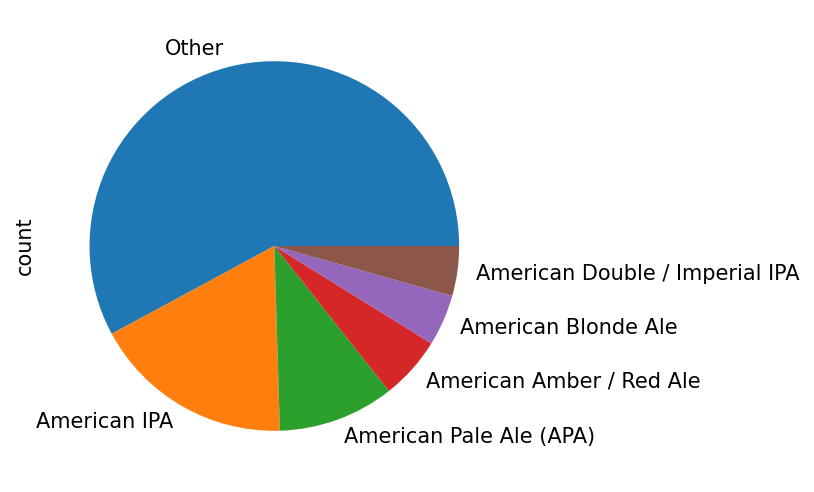

In [43]:
truncated = beer['type'].copy()
top_types = truncated.value_counts().head(5).index # do value counts and get the index
truncated[~truncated.isin(top_types)] = 'Other' # set to 'Other' when *not* isin the top_types
truncated.value_counts().plot(kind='pie')

## Line Chart

The default plot. Useful for showing change in continuous or interval data.

In [44]:
unique_movies = movies[['title', 'year']].drop_duplicates()
movies_by_year = unique_movies.groupby('year')[['title']].size()
movies_by_year.sample(1)

year
1997    267
dtype: int64

<Axes: xlabel='year'>

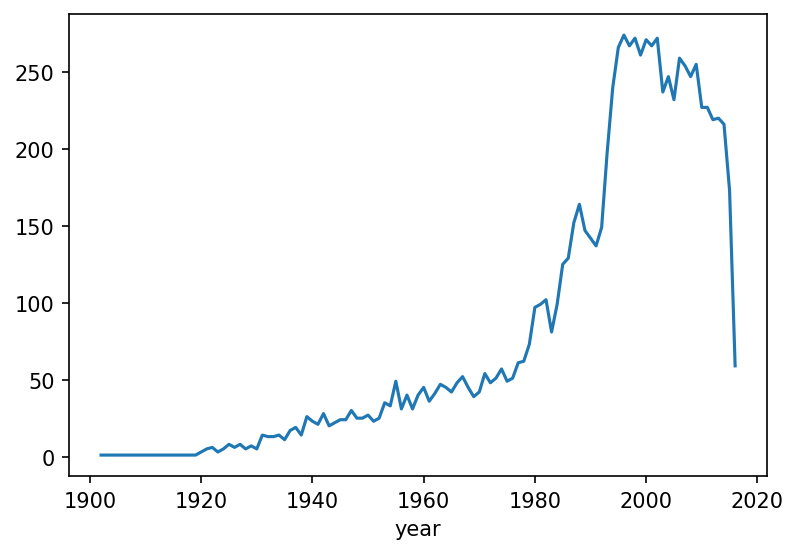

In [45]:
movies_by_year.plot() 

<Axes: xlabel='year'>

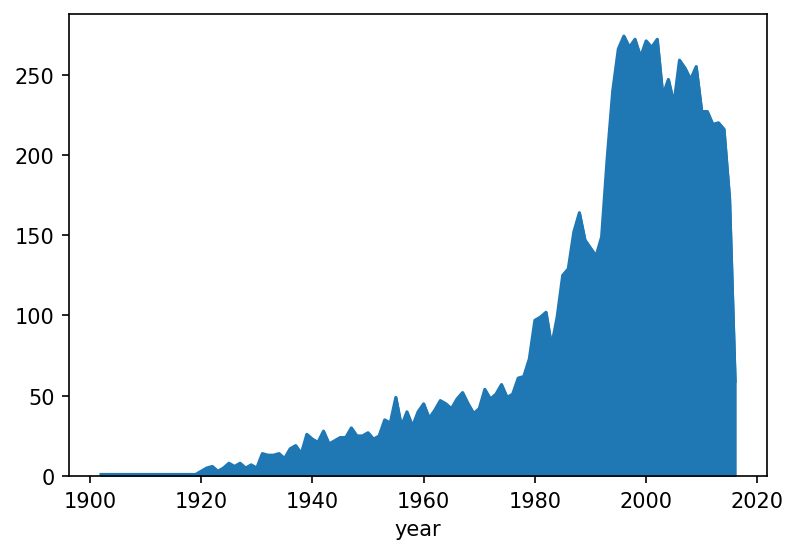

In [46]:
movies_by_year.plot(kind='area')

## <center>Exercises</center>

## <center>Where to go next?</center>

*matplotlib* is fairly low-level: it's very customizable, but more advanced to use.

Plotting in Pandas is higher-level: it builds on top of *matplotlib*, making some choices for you in exchange for ease of use.

If the out of the box plots don't work:

- (1) **Customizing default charts**: Read the pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
- (3) **Use matplotlib directly**: Use the [visualization gallery](https://matplotlib.org/gallery.html) for ideas.

![](../images/matplot-gallery.png)

### Seaborn

Looking for more advanced visualizations without the complexity of *matplotlib*? 

*Seaborn* is a high-level visualization library that makes certain types of *advanced* graphs easier to plot.

In [47]:
import seaborn as sns

[Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)
![Seaborn Gallery](../images/seaborn-gallery.png)

#### Linear Regression with `lmplot`

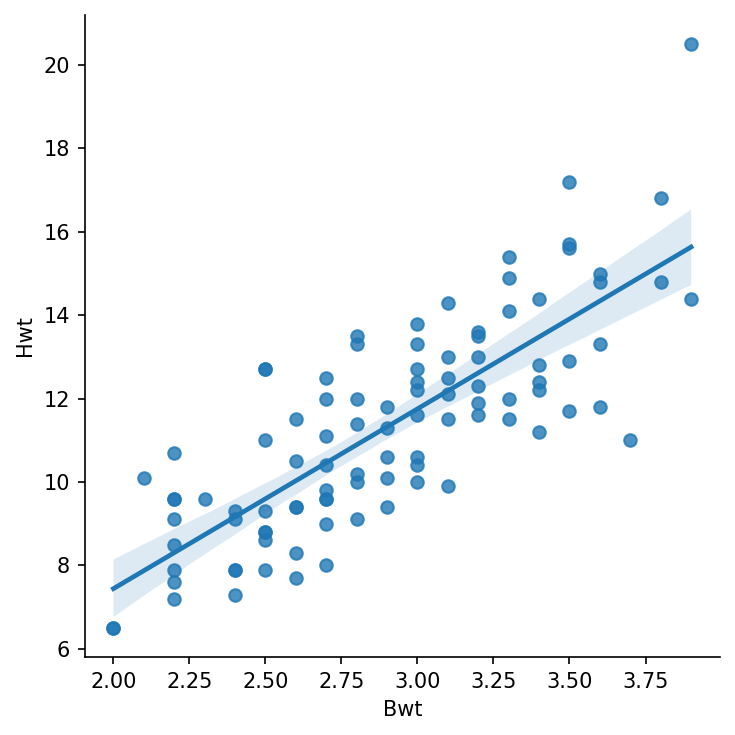

In [48]:
import seaborn as sns
sns.lmplot(data=cats, x='Bwt', y='Hwt')

Various alternate regression fits are possible: read the docs!

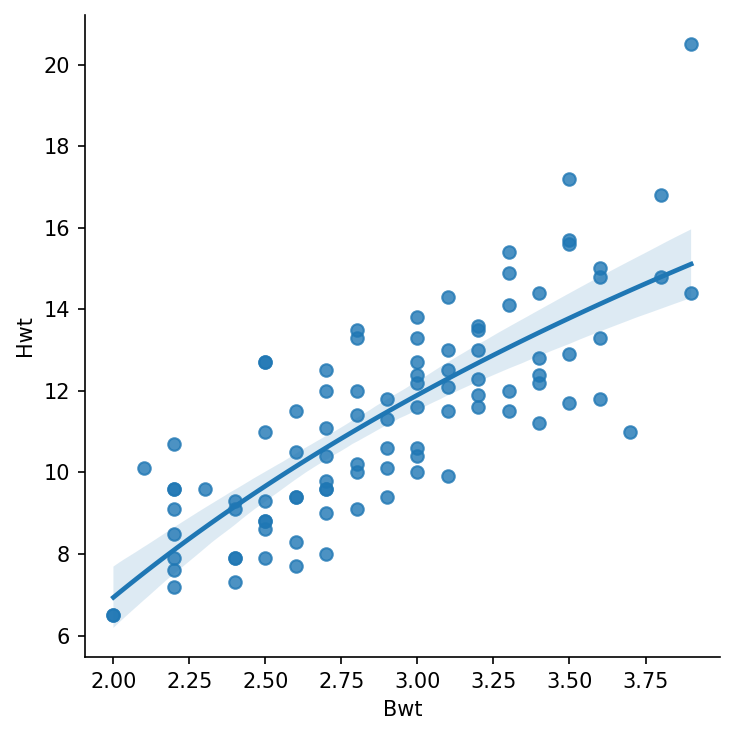

In [49]:
sns.lmplot(data=cats, x='Bwt', y='Hwt', logx=True)